In [14]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

def load_data(file_path):
    """Charge les données à partir du fichier CSV."""
    return pd.read_csv(file_path)

def apply_gmm(data, column, n_components_range=range(1, 10)):
    """Applique le GMM à une colonne spécifique pour trouver le nombre optimal de clusters."""
    X = data[column].values.reshape(-1, 1)  # Redimensionnement pour le GMM
    bics = []
    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components, random_state=42)
        gmm.fit(X)
        bics.append(gmm.bic(X))
    optimal_n_components = n_components_range[np.argmin(bics)]
    gmm_optimal = GaussianMixture(n_components=optimal_n_components, random_state=42)
    gmm_optimal.fit(X)
    cluster_labels = gmm_optimal.predict(X)
    return optimal_n_components, cluster_labels, n_components_range, bics

def generate_columns_to_exclude(X):
    """Génère la liste des colonnes à exclure en fonction de la valeur de X."""
    base_columns_to_exclude = [
        "nightlights_50m", "nightlights_20m","nightlights_100m",
        "nightlights_25m", "nightlights_30m", "nightlights_150m",
        "nightlights_1000m", "nightlights_5000m", "nightlights_0m"
    ]
    
    specific_column = f"nightlights_{X}m"
    if specific_column in base_columns_to_exclude:
        base_columns_to_exclude.remove(specific_column)
    
    return base_columns_to_exclude

def main(file_path, X, moitiequarts, Y):
    """Charge les données, applique le GMM, et prépare le DataFrame final selon les paramètres fournis."""
    # Générer les noms dynamiquement
    column_to_cluster = f"nightlights_{X}m"
    df_name = f"df_nightlights_{X}m_{moitiequarts}_IPM_{Y}"
    bin_column = f"nightlights_{X}m_bins"
    
    # Générer la liste des colonnes à exclure
    columns_to_exclude = generate_columns_to_exclude(X)
    
    # Charger les données
    data = load_data(file_path)
    
    # Appliquer le GMM
    optimal_n_components, cluster_labels, n_components_range, bics = apply_gmm(data, column_to_cluster)
    
    # Afficher la liste des scores BIC
    print("Scores BIC pour chaque nombre de clusters :")
    for n, bic in zip(n_components_range, bics):
        print(f"Nombre de clusters: {n}, BIC: {bic}")
    
    # Créer le DataFrame final et ajouter les étiquettes de cluster
    df_result = data.drop(columns=columns_to_exclude)
    df_result[bin_column] = cluster_labels
    
    # Afficher les résultats
    print(f"Nombre optimal de clusters pour '{column_to_cluster}': {optimal_n_components}")
    print(df_result.head())
    
    # Sauvegarder le DataFrame avec un nom dynamique
    globals()[df_name] = df_result

    # Tracer le graphique des scores BIC
    plt.figure(figsize=(10, 6))
    plt.plot(n_components_range, bics, marker='o', linestyle='-')
    plt.title("Relation entre le nombre de clusters et le BIC")
    plt.xlabel("Nombre de clusters")
    plt.ylabel("Score BIC")
    plt.grid(True)
    
    # Annoter chaque point avec son score BIC en texte oblique
    for (i, txt) in zip(n_components_range, bics):
        plt.annotate(f"{txt:.2f}",  # Texte à annoter
                     (i, txt),  # Position (x, y) pour l'annotation
                     textcoords="offset points",  # Coordonnées relatives à la position
                     xytext=(0, 5),  # Décalage textuel (x, y)
                     ha='center',  # Alignement horizontal
                     rotation=45)  # Texte oblique

    plt.show()
    
    # Tracer l'histogramme de la distribution des "nightlights"
    plt.figure(figsize=(10, 6))
    plt.hist(df_result[bin_column], bins='auto', alpha=0.7, rwidth=0.85)
    plt.xlabel(f'Nightlights Bin {X} mètres')  # Label for the x-axis
    plt.ylabel('Frequency')  # Label for the y-axis
    plt.title(f'Distribution of Nightlights Bin {X} mètres')  # Title of the histogram
    plt.grid(axis='y', alpha=0.75)
    plt.show()
    
    # Définir le chemin du fichier de sortie
    output_file_path = f'D:\\Poverty_Predict_Par_Region\\Data_group_1\\df_nightlights_{X}m_{moitiequarts}_IPM_{Y}.csv'

    # Exporter le DataFrame en fichier CSV
    df_result.to_csv(output_file_path, index=False)
    print(f"DataFrame sauvegardé sous {output_file_path}")
    
    # Retourner le DataFrame avec le nom dynamique
    return df_result


c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows

Scores BIC pour chaque nombre de clusters :
Nombre de clusters: 1, BIC: 20543.322978827742
Nombre de clusters: 2, BIC: 18543.83367160348
Nombre de clusters: 3, BIC: 18534.21726933515
Nombre de clusters: 4, BIC: 18475.546296070494
Nombre de clusters: 5, BIC: 18311.08959271904
Nombre de clusters: 6, BIC: 18298.7403998651
Nombre de clusters: 7, BIC: 18288.22477320569
Nombre de clusters: 8, BIC: 18288.483308056
Nombre de clusters: 9, BIC: 18317.00558838966
Nombre optimal de clusters pour 'nightlights_50m': 7
  country  year   hhid  grappe  menage  vague      zae              region  \
0     CIV  2018  101.0       1       1      1  ABIDJAN  AUTONOME D'ABIDJAN   
1     CIV  2018  102.0       1       2      1  ABIDJAN  AUTONOME D'ABIDJAN   
2     CIV  2018  103.0       1       3      1  ABIDJAN  AUTONOME D'ABIDJAN   
3     CIV  2018  104.0       1       4      1  ABIDJAN  AUTONOME D'ABIDJAN   
4     CIV  2018  105.0       1       5      1  ABIDJAN  AUTONOME D'ABIDJAN   

   milieu         mil

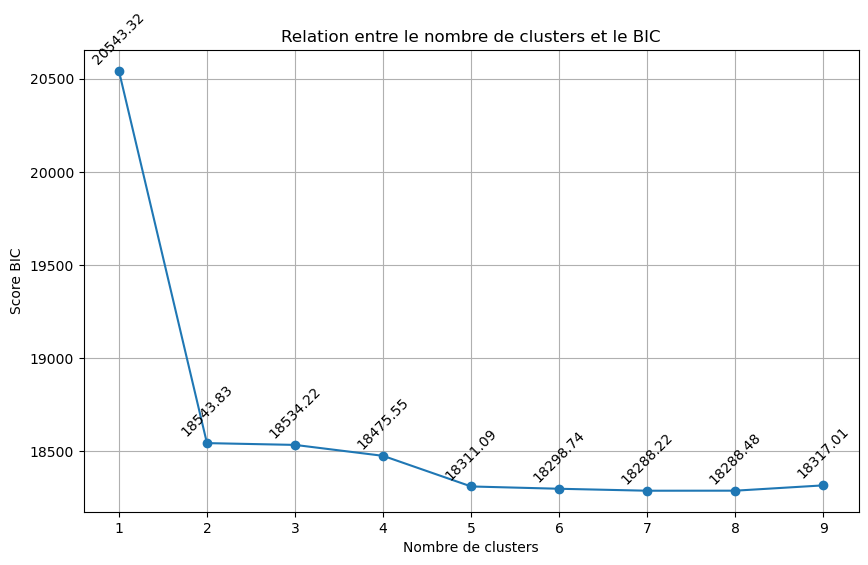

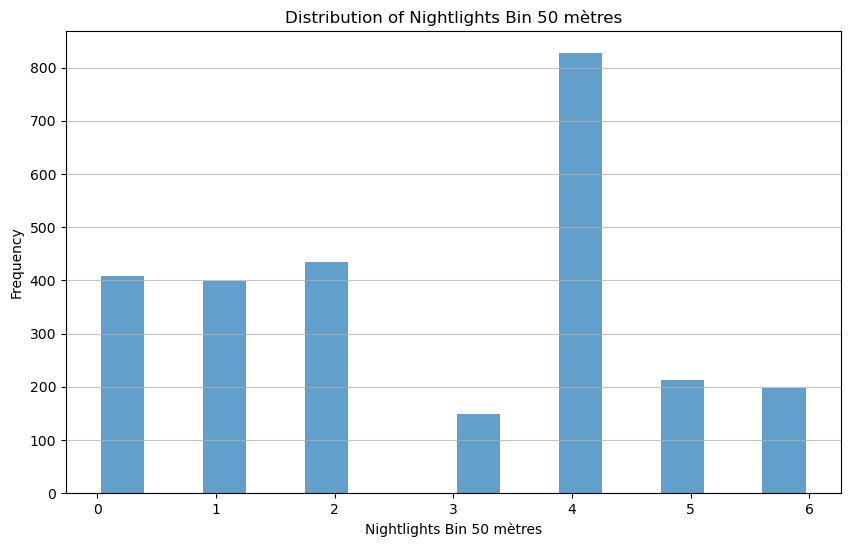

DataFrame sauvegardé sous D:\Poverty_Predict_Par_Region\Data_group_1\df_nightlights_50m_moitie_IPM_100.csv


In [15]:
# Paramètres de l'utilisateur
file_path = r'D:\Poverty_Predict_Par_Region\moins_pauvre_data_g1.csv' #Chemin des données d'enquetes en milieu rural

X = 50
moitiequarts = 'moitie'
Y = 100

# Exécution principale
df_result = main(file_path, X, moitiequarts, Y)

In [16]:
# Affichage du DataFrame avec le nom dynamique
df_name = f"df_nightlights_{X}m_{moitiequarts}_IPM_{Y}"
print(f"Affichage de {df_name} :")
print(globals()[df_name])

Affichage de df_nightlights_50m_moitie_IPM_100 :
     country  year     hhid  grappe  menage  vague      zae  \
0        CIV  2018    101.0       1       1      1  ABIDJAN   
1        CIV  2018    102.0       1       2      1  ABIDJAN   
2        CIV  2018    103.0       1       3      1  ABIDJAN   
3        CIV  2018    104.0       1       4      1  ABIDJAN   
4        CIV  2018    105.0       1       5      1  ABIDJAN   
...      ...   ...      ...     ...     ...    ...      ...   
2622     CIV  2019  50208.0     502       8      2  SUD-EST   
2623     CIV  2019  50209.0     502       9      2  SUD-EST   
2624     CIV  2019  50210.0     502      10      2  SUD-EST   
2625     CIV  2019  50211.0     502      11      2  SUD-EST   
2626     CIV  2019  50212.0     502      12      2  SUD-EST   

                  region  milieu         milieu2  ...  GPS__Latitude  \
0     AUTONOME D'ABIDJAN  Urbain  Abidjan urbain  ...       5.340541   
1     AUTONOME D'ABIDJAN  Urbain  Abidjan urbain  

In [17]:
globals()[df_name][f'nightlights_{X}m_bins'].unique()

array([1, 3, 2, 6, 5, 0, 4], dtype=int64)

In [18]:
import pandas as pd

# Charger le DataFrame sans doublons
file_path = f'D:\\Poverty_Predict_Par_Region\\Data_group_1\\df_nightlights_{X}m_{moitiequarts}_IPM_{Y}.csv'

df = pd.read_csv(file_path)

# Afficher les éléments de la colonne 'grappe'
print("Éléments de la colonne 'grappe':")
print(df['grappe'])

# Afficher les chiffres uniques dans la colonne 'grappe'
unique_values = df['grappe'].unique()
print("\nChiffres uniques dans la colonne 'grappe':")
print(unique_values)

# Afficher la fréquence de chaque chiffre unique
value_counts = df['grappe'].value_counts()
print("\nFréquence des chiffres dans la colonne 'grappe':")
print(value_counts)


Éléments de la colonne 'grappe':
0         1
1         1
2         1
3         1
4         1
       ... 
2622    502
2623    502
2624    502
2625    502
2626    502
Name: grappe, Length: 2627, dtype: int64

Chiffres uniques dans la colonne 'grappe':
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306
 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324
 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342
 343 344 345 346 347

##### Ajout d'une colonne 'is_train'

In [19]:
import pandas as pd

def load_dataframe(file_path):
    """Charger le DataFrame à partir du fichier CSV."""
    return pd.read_csv(file_path)

def mark_sample_by_group(df, group_column, n_samples):
    """Grouper le DataFrame par la colonne spécifiée, sélectionner un nombre aléatoire de lignes par groupe, et marquer ces lignes."""
    # Créer une colonne 'is_train' initialisée à False
    df['is_train'] = False
    # Sélectionner aléatoirement des échantillons par groupe
    sampled_indices = df.groupby(group_column).apply(lambda x: x.sample(n_samples).index).explode()
    # Marquer les lignes sélectionnées
    df.loc[sampled_indices, 'is_train'] = True
    return df

def save_dataframe(df, file_path):
    """Sauvegarder le DataFrame en fichier CSV."""
    df.to_csv(file_path, index=False)

In [20]:
# Définir les variables X, moitiequarts et Y pour personnaliser les chemins de fichiers
X = 50
moitiequarts ='moitie'
Y = 100
Data_milieu='Data_group_1'


In [21]:
# Chemin vers le fichier CSV d'origine
original_file_path = f'D:\\Poverty_Predict_Par_Region\\{Data_milieu}\\df_nightlights_{X}m_{moitiequarts}_IPM_{Y}.csv'

# Charger le DataFrame
df = load_dataframe(original_file_path)

# Marquer les lignes sélectionnées de manière aléatoire par groupe
df_marked = mark_sample_by_group(df, 'grappe', 4)
print("DataFrame avec colonne 'is_train':")
print(df_marked)

# Sauvegarder le DataFrame avec la nouvelle colonne 'is_train' en tant que fichier CSV
new_file_path = f'D:\\Poverty_Predict_Par_Region\\{Data_milieu}\\df_nightlights_{X}m_{moitiequarts}_IPM_{Y}_marked.csv'

save_dataframe(df_marked, new_file_path)

print("Le DataFrame avec colonne 'is_train' a été sauvegardé avec succès.")

DataFrame avec colonne 'is_train':
     country  year     hhid  grappe  menage  vague      zae  \
0        CIV  2018    101.0       1       1      1  ABIDJAN   
1        CIV  2018    102.0       1       2      1  ABIDJAN   
2        CIV  2018    103.0       1       3      1  ABIDJAN   
3        CIV  2018    104.0       1       4      1  ABIDJAN   
4        CIV  2018    105.0       1       5      1  ABIDJAN   
...      ...   ...      ...     ...     ...    ...      ...   
2622     CIV  2019  50208.0     502       8      2  SUD-EST   
2623     CIV  2019  50209.0     502       9      2  SUD-EST   
2624     CIV  2019  50210.0     502      10      2  SUD-EST   
2625     CIV  2019  50211.0     502      11      2  SUD-EST   
2626     CIV  2019  50212.0     502      12      2  SUD-EST   

                  region  milieu         milieu2  ...  GPS__Longitude  \
0     AUTONOME D'ABIDJAN  Urbain  Abidjan urbain  ...       -4.026030   
1     AUTONOME D'ABIDJAN  Urbain  Abidjan urbain  ...       -4

#### Concatenation de la colonne 'is train' et des images, nous avons 4 ménages par ZD sélectionnés aléatoirement dans le groupe 1

In [22]:
import os
import pandas as pd

def process_images_and_merge_data(csv_file_path, images_folder_path, save_folder_path, X, moitiequarts, Y):
    """Automatise le traitement des images et la fusion des données avec des noms de variables dynamiques."""
    # Générer le nom dynamique du DataFrame
    df_name = f"df_nightlights_{X}m_{moitiequarts}_IPM_{Y}"
    
    # Lire le fichier CSV sauvegardé
    df_nightlights = pd.read_csv(csv_file_path)
    
    # Extraire les informations des images
    image_info = []
    for image_file in os.listdir(images_folder_path):
        base_name, _ = os.path.splitext(image_file)
        base_name_with_extension = base_name + '.png'
        parts = base_name.split('_')
        if len(parts) >= 2:
            menage_lat, menage_lon = float(parts[0]), float(parts[1])
            image_info.append({
                'image_name': base_name_with_extension,
                'menage_lat': menage_lat,
                'menage_lon': menage_lon
            })

    df_images = pd.DataFrame(image_info)
    
    # Convertir les latitudes et longitudes pour la fusion
    df_nightlights['GPS__Latitude'] = df_nightlights['GPS__Latitude'].astype(float)
    df_nightlights['GPS__Longitude'] = df_nightlights['GPS__Longitude'].astype(float)

    # Fusionner les DataFrames
    df_download = pd.merge(df_images, df_nightlights, 
                           left_on=['menage_lat', 'menage_lon'], 
                           right_on=['GPS__Latitude', 'GPS__Longitude'], how='inner')

    # Sélection et renommage des colonnes pour le résultat final
    df_download = df_download.rename(columns={
        'pcexp': 'pcexp',
        f'nightlights_{X}m': f'nightlights_{X}m',
        f'nightlights_{X}m_bins': f'nightlights_{X}m_bins'
    })

    # Ajouter les colonnes 'grappe' et 'is_train'
    df_download['grappe'] = df_download['grappe']
    df_download['hhweight']=df_download['hhweight']
    df_download['hhsize']=df_download['hhsize']
    df_download['is_train'] = df_download['is_train']

    df_download = df_download[['image_name', 'menage_lat', 'menage_lon', 'grappe', 'hhweight', 'hhsize','is_train', 'pcexp', f'nightlights_{X}m', f'nightlights_{X}m_bins']]
    
    # Sauvegarder le DataFrame fusionné avec les doublons
    download_file_path_with_duplicates = os.path.join(save_folder_path, f'df_download_{X}m_{moitiequarts}_IPM_{Y}.csv')
    df_download.to_csv(download_file_path_with_duplicates, index=False)
    
    print(f"DataFrame fusionné avec doublons sauvegardé sous {download_file_path_with_duplicates}")
    
    # Étape 6: Afficher les valeurs du DataFrame
    print(df_download.head())
    print(df_download.shape)
    
    # Identifier les doublons exacts dans 'image_name' et obtenir leurs indices
    doublons_indices = df_download[df_download.duplicated(subset=['image_name'], keep='first')].index

    # Afficher les valeurs de 'image_name' qui sont des doublons et leurs indices
    for indice in doublons_indices:
        valeur_doublon = df_download.loc[indice, 'image_name']
        print(f"Indice: {indice}, Valeur Doublon: {valeur_doublon}")

    # Supprimer les doublons, en ne gardant que la première occurrence
    df_download_sans_doublons = df_download.drop_duplicates(subset=['image_name'], keep='first')

    # Maintenant, df_download_sans_doublons contient le DataFrame sans les doublons

    # Sauvegarder le DataFrame sans doublons avec un nom dynamique
    download_file_path_without_duplicates = os.path.join(save_folder_path, f'df_download_{X}m_{moitiequarts}_IPM_{Y}_vf.csv')
    df_download_sans_doublons.to_csv(download_file_path_without_duplicates, index=False)
    
    print(f"DataFrame fusionné sans doublons sauvegardé sous {download_file_path_without_duplicates}")

    # Compter le nombre total d'images
    image_count = len(os.listdir(images_folder_path))
    print(f"Nombre total d'images : {image_count}")
    
    return df_download, df_download_sans_doublons


In [23]:
# Paramètres de l'utilisateur
X = 50
moitiequarts = 'moitie'
Y = 100
Data_milieu='Data_group_1'

#### Changement de chemin

In [24]:
csv_file_path = f'D:\\Poverty_Predict_Par_Region\\{Data_milieu}\\df_nightlights_{X}m_{moitiequarts}_IPM_{Y}_marked.csv'
images_folder_path =r'D:\Processed_Data_400_42m_100img\Processed_Data_400\Image_Nombre_100_images_code_5'
save_folder_path = f'D:\\Poverty_Predict_Par_Region\\{Data_milieu}'

In [25]:
# Exécution principale
df_download_result, df_download_sans_doublons_result = process_images_and_merge_data(csv_file_path, images_folder_path, save_folder_path, X, moitiequarts, Y)


DataFrame fusionné avec doublons sauvegardé sous D:\Poverty_Predict_Par_Region\Data_group_1\df_download_50m_moitie_IPM_100.csv
                                   image_name  menage_lat  menage_lon  grappe  \
0    5.17020229250193_-3.06695429608226_1.png    5.170202   -3.066954     502   
1   5.17020229250193_-3.06695429608226_10.png    5.170202   -3.066954     502   
2  5.17020229250193_-3.06695429608226_100.png    5.170202   -3.066954     502   
3   5.17020229250193_-3.06695429608226_11.png    5.170202   -3.066954     502   
4   5.17020229250193_-3.06695429608226_12.png    5.170202   -3.066954     502   

    hhweight  hhsize  is_train     pcexp  nightlights_50m  \
0  150.53835      12     False  311621.0         0.303937   
1  150.53835      12     False  311621.0         0.303937   
2  150.53835      12     False  311621.0         0.303937   
3  150.53835      12     False  311621.0         0.303937   
4  150.53835      12     False  311621.0         0.303937   

   nightlights_50m_

In [26]:
pd.read_csv(f'D:\\Poverty_Predict_Par_Region\\{Data_milieu}\\df_download_{X}m_{moitiequarts}_IPM_{Y}_vf.csv')


,image_name,menage_lat,menage_lon,grappe,hhweight,hhsize,is_train,pcexp,nightlights_50m,nightlights_50m_bins
0,5.17020229250193_-3.06695429608226_1.png,5.170202,-3.066954,502,150.53835,12,False,311621.00,0.303937,4
1,5.17020229250193_-3.06695429608226_10.png,5.170202,-3.066954,502,150.53835,12,False,311621.00,0.303937,4
2,5.17020229250193_-3.06695429608226_100.png,5.170202,-3.066954,502,150.53835,12,False,311621.00,0.303937,4
3,5.17020229250193_-3.06695429608226_11.png,5.170202,-3.066954,502,150.53835,12,False,311621.00,0.303937,4
4,5.17020229250193_-3.06695429608226_12.png,5.170202,-3.066954,502,150.53835,12,False,311621.00,0.303937,4
...,...,...,...,...,...,...,...,...,...,...
262695,8.6887141_-2.8325876_95.png,8.688714,-2.832588,329,362.06985,7,True,450849.75,0.230594,4
262696,8.6887141_-2.8325876_96.png,8.688714,-2.832588,329,362.06985,7,True,450849.75,0.230594,4
262697,8.6887141_-2.8325876_97.png,8.688714,-2.832588,329,362.06985,7,True,450849.75,0.230594,4
262698,8.6887141_-2.8325876_98.png,8.688714,-2.832588,329,362.06985,7,True,450849.75,0.230594,4


In [27]:
essaie=pd.read_csv(f'D:\\Poverty_Predict_Par_Region\\{Data_milieu}\\df_download_{X}m_{moitiequarts}_IPM_{Y}_vf.csv')


In [28]:
sum(essaie["is_train"])

88000

In [29]:
essaie_2=pd.read_csv(f'D:\\Poverty_Predict_Par_Region\\{Data_milieu}\\df_nightlights_{X}m_{moitiequarts}_IPM_{Y}_marked.csv')

In [30]:
sum(essaie_2["is_train"])

880

##### On divise les données en ensemble d'entrainement et en ensemble de validation avec un ménage par ZD dans le training set et le reste dans le validation set 

In [31]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import pandas as pd


def load_and_split_data(file_path, X, moitiequarts, Y):
    """Charge le DataFrame et divise les données en ensembles d'entraînement et de validation basés sur la colonne 'is_train'."""
    # Générer le nom dynamique du DataFrame
    df_name = f"df_download_{X}m_{moitiequarts}_IPM_{Y}"
    
    # Charger le DataFrame
    df = pd.read_csv(file_path)
    
    # Séparer les données en ensembles d'entraînement et de validation
    df_train = df[df['is_train'] == True]
    df_valid = df[df['is_train'] == False]
    
    # Afficher la proportion d'éléments dans l'ensemble d'entraînement
    train_proportion = df_train.shape[0] / df.shape[0]
    print(f"Proportion d'éléments dans l'ensemble d'entraînement : {train_proportion}")
    
    # Retourner les DataFrames et le nom dynamique
    return df, df_train, df_valid, df_name

In [32]:
# Paramètres de l'utilisateur
X = 50
moitiequarts = 'moitie'
Y = 100
Data_milieu='Data_group_1'
# Chemin du fichier
file_path = f'D:\\Poverty_Predict_Par_Region\\{Data_milieu}\\df_download_{X}m_{moitiequarts}_IPM_{Y}_vf.csv'

# Exécution principale
df_download_result, df_train, df_valid, df_name = load_and_split_data(file_path, X, moitiequarts, Y)

Proportion d'éléments dans l'ensemble d'entraînement : 0.3349828701941378


In [33]:
# Attribuer le DataFrame à une variable avec un nom dynamique
globals()[df_name] = df_download_result

# Affichage du DataFrame modifié
print(f"Affichage de {df_name} :")
print(globals()[df_name].head()) 



Affichage de df_download_50m_moitie_IPM_100 :
                                   image_name  menage_lat  menage_lon  grappe  \
0    5.17020229250193_-3.06695429608226_1.png    5.170202   -3.066954     502   
1   5.17020229250193_-3.06695429608226_10.png    5.170202   -3.066954     502   
2  5.17020229250193_-3.06695429608226_100.png    5.170202   -3.066954     502   
3   5.17020229250193_-3.06695429608226_11.png    5.170202   -3.066954     502   
4   5.17020229250193_-3.06695429608226_12.png    5.170202   -3.066954     502   

    hhweight  hhsize  is_train     pcexp  nightlights_50m  \
0  150.53835      12     False  311621.0         0.303937   
1  150.53835      12     False  311621.0         0.303937   
2  150.53835      12     False  311621.0         0.303937   
3  150.53835      12     False  311621.0         0.303937   
4  150.53835      12     False  311621.0         0.303937   

   nightlights_50m_bins  
0                     4  
1                     4  
2                     

In [34]:
# Afficher la proportion des données dans l'ensemble d'entraînement
train_proportion = globals()[df_name]['is_train'].mean()
print(f"Proportion des données dans l'ensemble d'entraînement : {train_proportion}")

# Sauvegarder les DataFrames d'entraînement et de validation
train_file_path = f'D:/Poverty_Predict_Par_Region/{Data_milieu}/{df_name}_train.csv'
valid_file_path = f'D:/Poverty_Predict_Par_Region/{Data_milieu}/{df_name}_valid.csv'
df_train.to_csv(train_file_path, index=False)
df_valid.to_csv(valid_file_path, index=False)

print(f"DataFrame d'entraînement sauvegardé sous {train_file_path}")
print(f"DataFrame de validation sauvegardé sous {valid_file_path}")

# Vérification finale
print("Ensemble d'entraînement :")
print(df_train.head())
print("Ensemble de validation :")
print(df_valid.head())



Proportion des données dans l'ensemble d'entraînement : 0.3349828701941378
DataFrame d'entraînement sauvegardé sous D:/Poverty_Predict_Par_Region/Data_group_1/df_download_50m_moitie_IPM_100_train.csv
DataFrame de validation sauvegardé sous D:/Poverty_Predict_Par_Region/Data_group_1/df_download_50m_moitie_IPM_100_valid.csv
Ensemble d'entraînement :
                                     image_name  menage_lat  menage_lon  \
200    5.17205615993589_-3.06799834594131_1.png    5.172056   -3.067998   
201   5.17205615993589_-3.06799834594131_10.png    5.172056   -3.067998   
202  5.17205615993589_-3.06799834594131_100.png    5.172056   -3.067998   
203   5.17205615993589_-3.06799834594131_11.png    5.172056   -3.067998   
204   5.17205615993589_-3.06799834594131_12.png    5.172056   -3.067998   

     grappe   hhweight  hhsize  is_train      pcexp  nightlights_50m  \
200     502  150.53835       3      True  416609.06         0.303937   
201     502  150.53835       3      True  416609.06    

In [35]:
print("Ensemble d'entraînement :")
print(df_train.info())
print("Ensemble de validation :")
print(df_valid.info())

Ensemble d'entraînement :
<class 'pandas.core.frame.DataFrame'>
Index: 88000 entries, 200 to 262699
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   image_name            88000 non-null  object 
 1   menage_lat            88000 non-null  float64
 2   menage_lon            88000 non-null  float64
 3   grappe                88000 non-null  int64  
 4   hhweight              88000 non-null  float64
 5   hhsize                88000 non-null  int64  
 6   is_train              88000 non-null  bool   
 7   pcexp                 88000 non-null  float64
 8   nightlights_50m       88000 non-null  float64
 9   nightlights_50m_bins  88000 non-null  int64  
dtypes: bool(1), float64(5), int64(3), object(1)
memory usage: 6.8+ MB
None
Ensemble de validation :
<class 'pandas.core.frame.DataFrame'>
Index: 174700 entries, 0 to 262599
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtyp

##### Creation des dossiers training et validation set pour accueillir les données

In [36]:
globals()[df_name]

,image_name,menage_lat,menage_lon,grappe,hhweight,hhsize,is_train,pcexp,nightlights_50m,nightlights_50m_bins
0,5.17020229250193_-3.06695429608226_1.png,5.170202,-3.066954,502,150.53835,12,False,311621.00,0.303937,4
1,5.17020229250193_-3.06695429608226_10.png,5.170202,-3.066954,502,150.53835,12,False,311621.00,0.303937,4
2,5.17020229250193_-3.06695429608226_100.png,5.170202,-3.066954,502,150.53835,12,False,311621.00,0.303937,4
3,5.17020229250193_-3.06695429608226_11.png,5.170202,-3.066954,502,150.53835,12,False,311621.00,0.303937,4
4,5.17020229250193_-3.06695429608226_12.png,5.170202,-3.066954,502,150.53835,12,False,311621.00,0.303937,4
...,...,...,...,...,...,...,...,...,...,...
262695,8.6887141_-2.8325876_95.png,8.688714,-2.832588,329,362.06985,7,True,450849.75,0.230594,4
262696,8.6887141_-2.8325876_96.png,8.688714,-2.832588,329,362.06985,7,True,450849.75,0.230594,4
262697,8.6887141_-2.8325876_97.png,8.688714,-2.832588,329,362.06985,7,True,450849.75,0.230594,4
262698,8.6887141_-2.8325876_98.png,8.688714,-2.832588,329,362.06985,7,True,450849.75,0.230594,4


In [37]:
# Préparation des répertoires et chargement des DataFrames d'entraînement et de validation
BASE_DIR = r'D:\Poverty_Predict_Par_Region'

RANDOM_SEED = 7 # Pour réplication
PROCESSED_DIR = os.path.join(BASE_DIR,f'{Data_milieu}', 'processed') 

CNN_TRAIN_IMAGE_DIR = os.path.join(BASE_DIR, f'{Data_milieu}/cnn_images_{X}m_{moitiequarts}_IPM_{Y}')
CNN_SAVE_DIR = os.path.join(BASE_DIR,f'{Data_milieu}', f'models_{X}m_{moitiequarts}_IPM_{Y}') 

os.makedirs(CNN_TRAIN_IMAGE_DIR, exist_ok=True)
os.makedirs(CNN_SAVE_DIR, exist_ok=True) 
os.makedirs(PROCESSED_DIR, exist_ok=True) 

# Calcul du nombre de classes uniques dans 'nightlights_{X}m_bins'
nombre_de_classes = globals()[df_name][f'nightlights_{X}m_bins'].nunique()

# Création de labels basés sur le nombre de classes
labels = [str(i) for i in range(nombre_de_classes)]

# Sauvegarde du nouveau DataFrame
globals()[df_name].to_csv(os.path.join(PROCESSED_DIR, f'image_download_actual_{X}m_{moitiequarts}_IPM_{Y}.csv'), index=False)

# Création des dossiers de base pour 'train' et 'valid'
os.makedirs(os.path.join(CNN_TRAIN_IMAGE_DIR, f'train_{X}m_{moitiequarts}_IPM_{Y}'), exist_ok=True)
os.makedirs(os.path.join(CNN_TRAIN_IMAGE_DIR, f'valid_{X}m_{moitiequarts}_IPM_{Y}'), exist_ok=True)

# Création des sous-dossiers pour chaque label dans 'train' et 'valid'
for l in labels:
    os.makedirs(os.path.join(CNN_TRAIN_IMAGE_DIR, f'train_{X}m_{moitiequarts}_IPM_{Y}', l), exist_ok=True)
    os.makedirs(os.path.join(CNN_TRAIN_IMAGE_DIR, f'valid_{X}m_{moitiequarts}_IPM_{Y}', l), exist_ok=True)

# Séparation des ensembles d'entraînement et de validation
t = globals()[df_name][globals()[df_name]['is_train']]
v = globals()[df_name][~globals()[df_name]['is_train']]

# Sauvegarde des ensembles d'entraînement et de validation
v.to_csv(os.path.join(BASE_DIR, f'validation_set_{X}m_{moitiequarts}_IPM_{Y}.csv'), index=False)
t.to_csv(os.path.join(BASE_DIR, f'training_set_{X}m_{moitiequarts}_IPM_{Y}.csv'), index=False)

print(f"Les fichiers de validation et d'entraînement ont été sauvegardés.")

# Longueur des ensembles d'entraînement et de validation
print(f"Nombre d'éléments dans l'ensemble d'entraînement: {len(t)}")
print(f"Nombre d'éléments dans l'ensemble de validation: {len(v)}")

Les fichiers de validation et d'entraînement ont été sauvegardés.
Nombre d'éléments dans l'ensemble d'entraînement: 88000
Nombre d'éléments dans l'ensemble de validation: 174700


In [38]:
IMAGE_DIR = r'D:\Processed_Data_400_42m_100img\Processed_Data_400\Image_Nombre_100_images_code_5'


##### Préparation des directoires, marquages des images d'entrainement et de validation dans des dossiers 

In [39]:
# Organiser les images d'entraînement
print('Organizing training images')

for im_name, nl in tqdm(zip(t['image_name'], t[f'nightlights_{X}m_bins']), total=len(t)):
    src = os.path.abspath(os.path.join(IMAGE_DIR, im_name))  
    dest = os.path.join(CNN_TRAIN_IMAGE_DIR, f'train_{X}m_{moitiequarts}_IPM_{Y}', str(nl), im_name)
    
    os.makedirs(os.path.dirname(dest), exist_ok=True)
    
    try:
        os.symlink(src, dest)
    except OSError as e:
        print(f"Error creating symlink for {im_name}: {e}")


Organizing training images


100%|██████████| 88000/88000 [00:20<00:00, 4263.75it/s]


In [40]:
# Organiser les images de validation
print('Organizing validation images')

for im_name, nl in tqdm(zip(v['image_name'], v[f'nightlights_{X}m_bins']), total=len(v)):
    src = os.path.abspath(os.path.join(IMAGE_DIR, im_name))  
    dest = os.path.join(CNN_TRAIN_IMAGE_DIR, f'valid_{X}m_{moitiequarts}_IPM_{Y}', str(nl), im_name)

    os.makedirs(os.path.dirname(dest), exist_ok=True)
    
    try:
        os.symlink(src, dest)
    except OSError as e:
        print(f"Error creating symlink for {im_name}: {e}")



Organizing validation images


100%|██████████| 174700/174700 [00:35<00:00, 4900.56it/s]


In [41]:
# Montre le décompte des images par classe dans chaque dossier du training set
counts = []
for l in range(nombre_de_classes):
    folder_name = f"{l}" 
    path_to_folder = os.path.join(CNN_TRAIN_IMAGE_DIR,f'train_{X}m_{moitiequarts}_IPM_{Y}', folder_name)
    counts.append(len(os.listdir(path_to_folder)))

print(counts)

# Calculer la proportion de chaque classe
proportions = [c/sum(counts) for c in counts]
print(proportions)

# Afficher la somme totale pour vérifier
print(sum(counts))


[13600, 13500, 14400, 5000, 27800, 7100, 6600]
[0.15454545454545454, 0.1534090909090909, 0.16363636363636364, 0.056818181818181816, 0.3159090909090909, 0.08068181818181819, 0.075]
88000


### Entrainement du modèle

##### Préparation des Données et du Modèle
##### Initialisation du Modèle
##### Transformation des Données

In [42]:
!pip install torchvision

In [43]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import copy

##### Mettre à jour le nombre de classe

In [44]:
# Le directoire
data_dir = CNN_TRAIN_IMAGE_DIR

# Activer le débogage CUDA
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# Modèles à choisir entre resnet, alexnet, vgg, squeezenet, densenet, inception
model_name = "vgg"

# Le nombre de catégories pour la classification
num_classes = 7 #Mettre à jour le nombre de classe

# Taille de lot pour l'entraînement (à modifier selon la quantité de mémoire disponible)
batch_size = 8

# Nombre d'époques pour l'entraînement,
#les 10 premières seront consacrées à l'entraînement des nouvelles couches,
#les 10 dernières à l'ensemble du modèle.
num_epochs = 20

# Flag pour l'extraction de caractéristiques. Lorsqu'il est à False, nous affinons tout le modèle.
#   quand il est à True, nous mettons à jour uniquement les paramètres des couches remodelées
feature_extract = True 





In [45]:
data_dir

'D:\\Poverty_Predict_Par_Region\\Data_group_1/cnn_images_50m_moitie_IPM_100'

In [46]:
def initialize_model(model_name, num_classes, feature_extract, use_pretrained=True):
    # Initialisez les variables qui seront définies dans ce 'if-statement'.
    # Chacune de ces variables est spécifique au modèle.
    model_ft = models.vgg11_bn(pretrained=use_pretrained)
    set_parameter_requires_grad(model_ft, feature_extract)
    num_ftrs = model_ft.classifier[6].in_features
    model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
    input_size = 224
    return model_ft, input_size

def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False 



In [47]:
# Initialiser le modèle pour l'exécution
model_ft, input_size = initialize_model(model_name, num_classes, feature_extract, use_pretrained=True)

# Imprimer
model_ft 

print('Initializing Datasets and Dataloaders...')

c:\Users\Dell\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Initializing Datasets and Dataloaders...


In [48]:
# Data augmentation and normalization for training
# Just normalization for validation

data_transforms = {
    f'train_{X}m_{moitiequarts}_IPM_{Y}': transforms.Compose([
        transforms.RandomResizedCrop(input_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    f'valid_{X}m_{moitiequarts}_IPM_{Y}': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [49]:
# Création des ensembles de données d'entraînement et de validation
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in [f'train_{X}m_{moitiequarts}_IPM_{Y}', f'valid_{X}m_{moitiequarts}_IPM_{Y}']}

# Création des dataloaders d'entraînement et de validation
dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in [f'train_{X}m_{moitiequarts}_IPM_{Y}', f'valid_{X}m_{moitiequarts}_IPM_{Y}']}



In [50]:
# Inspectons pour savoir si nous avons un GPU (Graphical Processing Unit) disponible
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('device:', device)



device: cuda:0


In [51]:
# Envoyer le modèle sur le GPU
model_ft = model_ft.to(device)

# Rassembler les paramètres qui doivent être optimisés/mis à jour dans cette exécution.
params_to_update = model_ft.parameters()
print("Params to learn:")
if feature_extract:
    params_to_update = []
    for name, param in model_ft.named_parameters():
        if param.requires_grad:
            params_to_update.append(param)
            print("\t", name)
else:
    for name, param in model_ft.named_parameters():
        if param.requires_grad:
            print("\t", name)

# Observons que tous les paramètres sont optimisés
optimizer_ft = optim.SGD(params_to_update, lr=1e-4, momentum=0.9)



Params to learn:
	 classifier.6.weight
	 classifier.6.bias


In [52]:
# Fonction d'entraînement du modèle
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25):
    since = time.time()

    val_acc_history = []
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        if epoch > 10:
            # Fine tune whole model
            for param in model_ft.parameters():
                param.requires_grad = True
            optimizer = optim.SGD(model_ft.parameters(), lr=1e-4, momentum=0.9)

        # Each epoch has a training and validation phase
        for phase in [f'train_{X}m_{moitiequarts}_IPM_{Y}', f'valid_{X}m_{moitiequarts}_IPM_{Y}']:
            if phase == f'train_{X}m_{moitiequarts}_IPM_{Y}':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in tqdm(dataloaders[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                # Track history if only in train
                with torch.set_grad_enabled(phase == f'train_{X}m_{moitiequarts}_IPM_{Y}'):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # Backward + optimize only if in training phase
                    if phase == f'train_{X}m_{moitiequarts}_IPM_{Y}':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # Deep copy the model
            if phase == f'valid_{X}m_{moitiequarts}_IPM_{Y}' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == f'valid_{X}m_{moitiequarts}_IPM_{Y}':
                val_acc_history.append(epoch_acc)
                
        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history



In [53]:
# Setup the loss function
criterion = nn.CrossEntropyLoss()

# Train and evaluate
model_ft, hist = train_model(model_ft, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs) 



Epoch 0/19
----------


100%|██████████| 11000/11000 [04:41<00:00, 39.01it/s]


train_50m_moitie_IPM_100 Loss: 1.3056 Acc: 0.5096


100%|██████████| 21838/21838 [08:22<00:00, 43.43it/s]


valid_50m_moitie_IPM_100 Loss: 1.0745 Acc: 0.5952

Epoch 1/19
----------


100%|██████████| 11000/11000 [04:29<00:00, 40.77it/s]


train_50m_moitie_IPM_100 Loss: 1.2063 Acc: 0.5433


100%|██████████| 21838/21838 [08:16<00:00, 44.01it/s]


valid_50m_moitie_IPM_100 Loss: 1.0314 Acc: 0.6196

Epoch 2/19
----------


100%|██████████| 11000/11000 [04:29<00:00, 40.79it/s]


train_50m_moitie_IPM_100 Loss: 1.1767 Acc: 0.5571


100%|██████████| 21838/21838 [08:15<00:00, 44.05it/s]


valid_50m_moitie_IPM_100 Loss: 1.0013 Acc: 0.6286

Epoch 3/19
----------


100%|██████████| 11000/11000 [04:29<00:00, 40.77it/s]


train_50m_moitie_IPM_100 Loss: 1.1653 Acc: 0.5616


100%|██████████| 21838/21838 [08:15<00:00, 44.04it/s]


valid_50m_moitie_IPM_100 Loss: 0.9804 Acc: 0.6419

Epoch 4/19
----------


100%|██████████| 11000/11000 [04:29<00:00, 40.85it/s]


train_50m_moitie_IPM_100 Loss: 1.1515 Acc: 0.5633


100%|██████████| 21838/21838 [08:14<00:00, 44.14it/s]


valid_50m_moitie_IPM_100 Loss: 0.9863 Acc: 0.6324

Epoch 5/19
----------


100%|██████████| 11000/11000 [04:29<00:00, 40.79it/s]


train_50m_moitie_IPM_100 Loss: 1.1460 Acc: 0.5672


100%|██████████| 21838/21838 [08:14<00:00, 44.15it/s]


valid_50m_moitie_IPM_100 Loss: 0.9550 Acc: 0.6471

Epoch 6/19
----------


100%|██████████| 11000/11000 [04:29<00:00, 40.79it/s]


train_50m_moitie_IPM_100 Loss: 1.1384 Acc: 0.5708


100%|██████████| 21838/21838 [08:15<00:00, 44.08it/s]


valid_50m_moitie_IPM_100 Loss: 0.9728 Acc: 0.6394

Epoch 7/19
----------


100%|██████████| 11000/11000 [04:29<00:00, 40.77it/s]


train_50m_moitie_IPM_100 Loss: 1.1311 Acc: 0.5738


100%|██████████| 21838/21838 [08:15<00:00, 44.11it/s]


valid_50m_moitie_IPM_100 Loss: 0.9386 Acc: 0.6485

Epoch 8/19
----------


100%|██████████| 11000/11000 [04:29<00:00, 40.83it/s]


train_50m_moitie_IPM_100 Loss: 1.1332 Acc: 0.5740


100%|██████████| 21838/21838 [08:15<00:00, 44.09it/s]


valid_50m_moitie_IPM_100 Loss: 0.9334 Acc: 0.6552

Epoch 9/19
----------


100%|██████████| 11000/11000 [04:30<00:00, 40.67it/s]


train_50m_moitie_IPM_100 Loss: 1.1307 Acc: 0.5714


100%|██████████| 21838/21838 [08:17<00:00, 43.91it/s]


valid_50m_moitie_IPM_100 Loss: 0.9340 Acc: 0.6548

Epoch 10/19
----------


100%|██████████| 11000/11000 [04:30<00:00, 40.59it/s]


train_50m_moitie_IPM_100 Loss: 1.1248 Acc: 0.5755


100%|██████████| 21838/21838 [08:16<00:00, 43.99it/s]


valid_50m_moitie_IPM_100 Loss: 0.9373 Acc: 0.6509

Epoch 11/19
----------


100%|██████████| 11000/11000 [14:25<00:00, 12.71it/s]


train_50m_moitie_IPM_100 Loss: 0.7950 Acc: 0.7044


100%|██████████| 21838/21838 [08:17<00:00, 43.86it/s]


valid_50m_moitie_IPM_100 Loss: 0.6252 Acc: 0.7860

Epoch 12/19
----------


100%|██████████| 11000/11000 [14:25<00:00, 12.71it/s]


train_50m_moitie_IPM_100 Loss: 0.4927 Acc: 0.8215


100%|██████████| 21838/21838 [08:16<00:00, 43.97it/s]


valid_50m_moitie_IPM_100 Loss: 0.5854 Acc: 0.8261

Epoch 13/19
----------


100%|██████████| 11000/11000 [14:16<00:00, 12.84it/s]


train_50m_moitie_IPM_100 Loss: 0.3566 Acc: 0.8724


100%|██████████| 21838/21838 [08:04<00:00, 45.06it/s]


valid_50m_moitie_IPM_100 Loss: 0.6387 Acc: 0.8376

Epoch 14/19
----------


100%|██████████| 11000/11000 [14:23<00:00, 12.73it/s]


train_50m_moitie_IPM_100 Loss: 0.2725 Acc: 0.9024


100%|██████████| 21838/21838 [08:14<00:00, 44.15it/s]


valid_50m_moitie_IPM_100 Loss: 0.6535 Acc: 0.8398

Epoch 15/19
----------


100%|██████████| 11000/11000 [14:23<00:00, 12.73it/s]


train_50m_moitie_IPM_100 Loss: 0.2235 Acc: 0.9213


100%|██████████| 21838/21838 [08:14<00:00, 44.21it/s]


valid_50m_moitie_IPM_100 Loss: 0.6754 Acc: 0.8504

Epoch 16/19
----------


100%|██████████| 11000/11000 [14:23<00:00, 12.73it/s]


train_50m_moitie_IPM_100 Loss: 0.1947 Acc: 0.9330


100%|██████████| 21838/21838 [08:14<00:00, 44.13it/s]


valid_50m_moitie_IPM_100 Loss: 0.6719 Acc: 0.8560

Epoch 17/19
----------


100%|██████████| 11000/11000 [14:24<00:00, 12.73it/s]


train_50m_moitie_IPM_100 Loss: 0.1672 Acc: 0.9413


100%|██████████| 21838/21838 [08:15<00:00, 44.11it/s]


valid_50m_moitie_IPM_100 Loss: 0.8053 Acc: 0.8438

Epoch 18/19
----------


100%|██████████| 11000/11000 [14:24<00:00, 12.73it/s]


train_50m_moitie_IPM_100 Loss: 0.1522 Acc: 0.9472


100%|██████████| 21838/21838 [08:21<00:00, 43.51it/s]


valid_50m_moitie_IPM_100 Loss: 0.7179 Acc: 0.8604

Epoch 19/19
----------


100%|██████████| 11000/11000 [14:27<00:00, 12.69it/s]


train_50m_moitie_IPM_100 Loss: 0.1393 Acc: 0.9519


100%|██████████| 21838/21838 [08:17<00:00, 43.87it/s]

valid_50m_moitie_IPM_100 Loss: 0.7633 Acc: 0.8553

Training complete in 344m 33s
Best val Acc: 0.860429


In [54]:
# Sauvegarder le modèle
model_path = os.path.join(CNN_SAVE_DIR ,f'trained_model_{X}m_{moitiequarts}_IPM_{Y}_vgg11bn.pt')
assert not os.path.isfile(model_path), print('Un modèle est déjà sauvegardé à cette destination')
print(f'Saving model to {model_path}')
torch.save(model_ft, model_path)

Saving model to D:\Poverty_Predict_Par_Region\Data_group_1\models_50m_moitie_IPM_100\trained_model_50m_moitie_IPM_100_vgg11bn.pt


#### Evaluation du modèle

In [55]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import copy
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [56]:
# Chargement du modèle
model_ft = torch.load(model_path)

# Évaluation sur le jeu d'entraînement
model_ft.eval()   # Set model to evaluate mode
running_loss = 0.0
running_corrects = 0
total = 0

for inputs, labels in tqdm(dataloaders_dict[f'train_{X}m_{moitiequarts}_IPM_{Y}']):
    inputs = inputs.to(device)
    labels = labels.to(device)

    with torch.set_grad_enabled(False):
        outputs = model_ft(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs, 1)

    running_loss += loss.item() * inputs.size(0)
    running_corrects += torch.sum(preds == labels.data)
    total += len(preds)
        
print(running_corrects.double() / total)



100%|██████████| 11000/11000 [04:11<00:00, 43.79it/s]

tensor(0.9798, device='cuda:0', dtype=torch.float64)


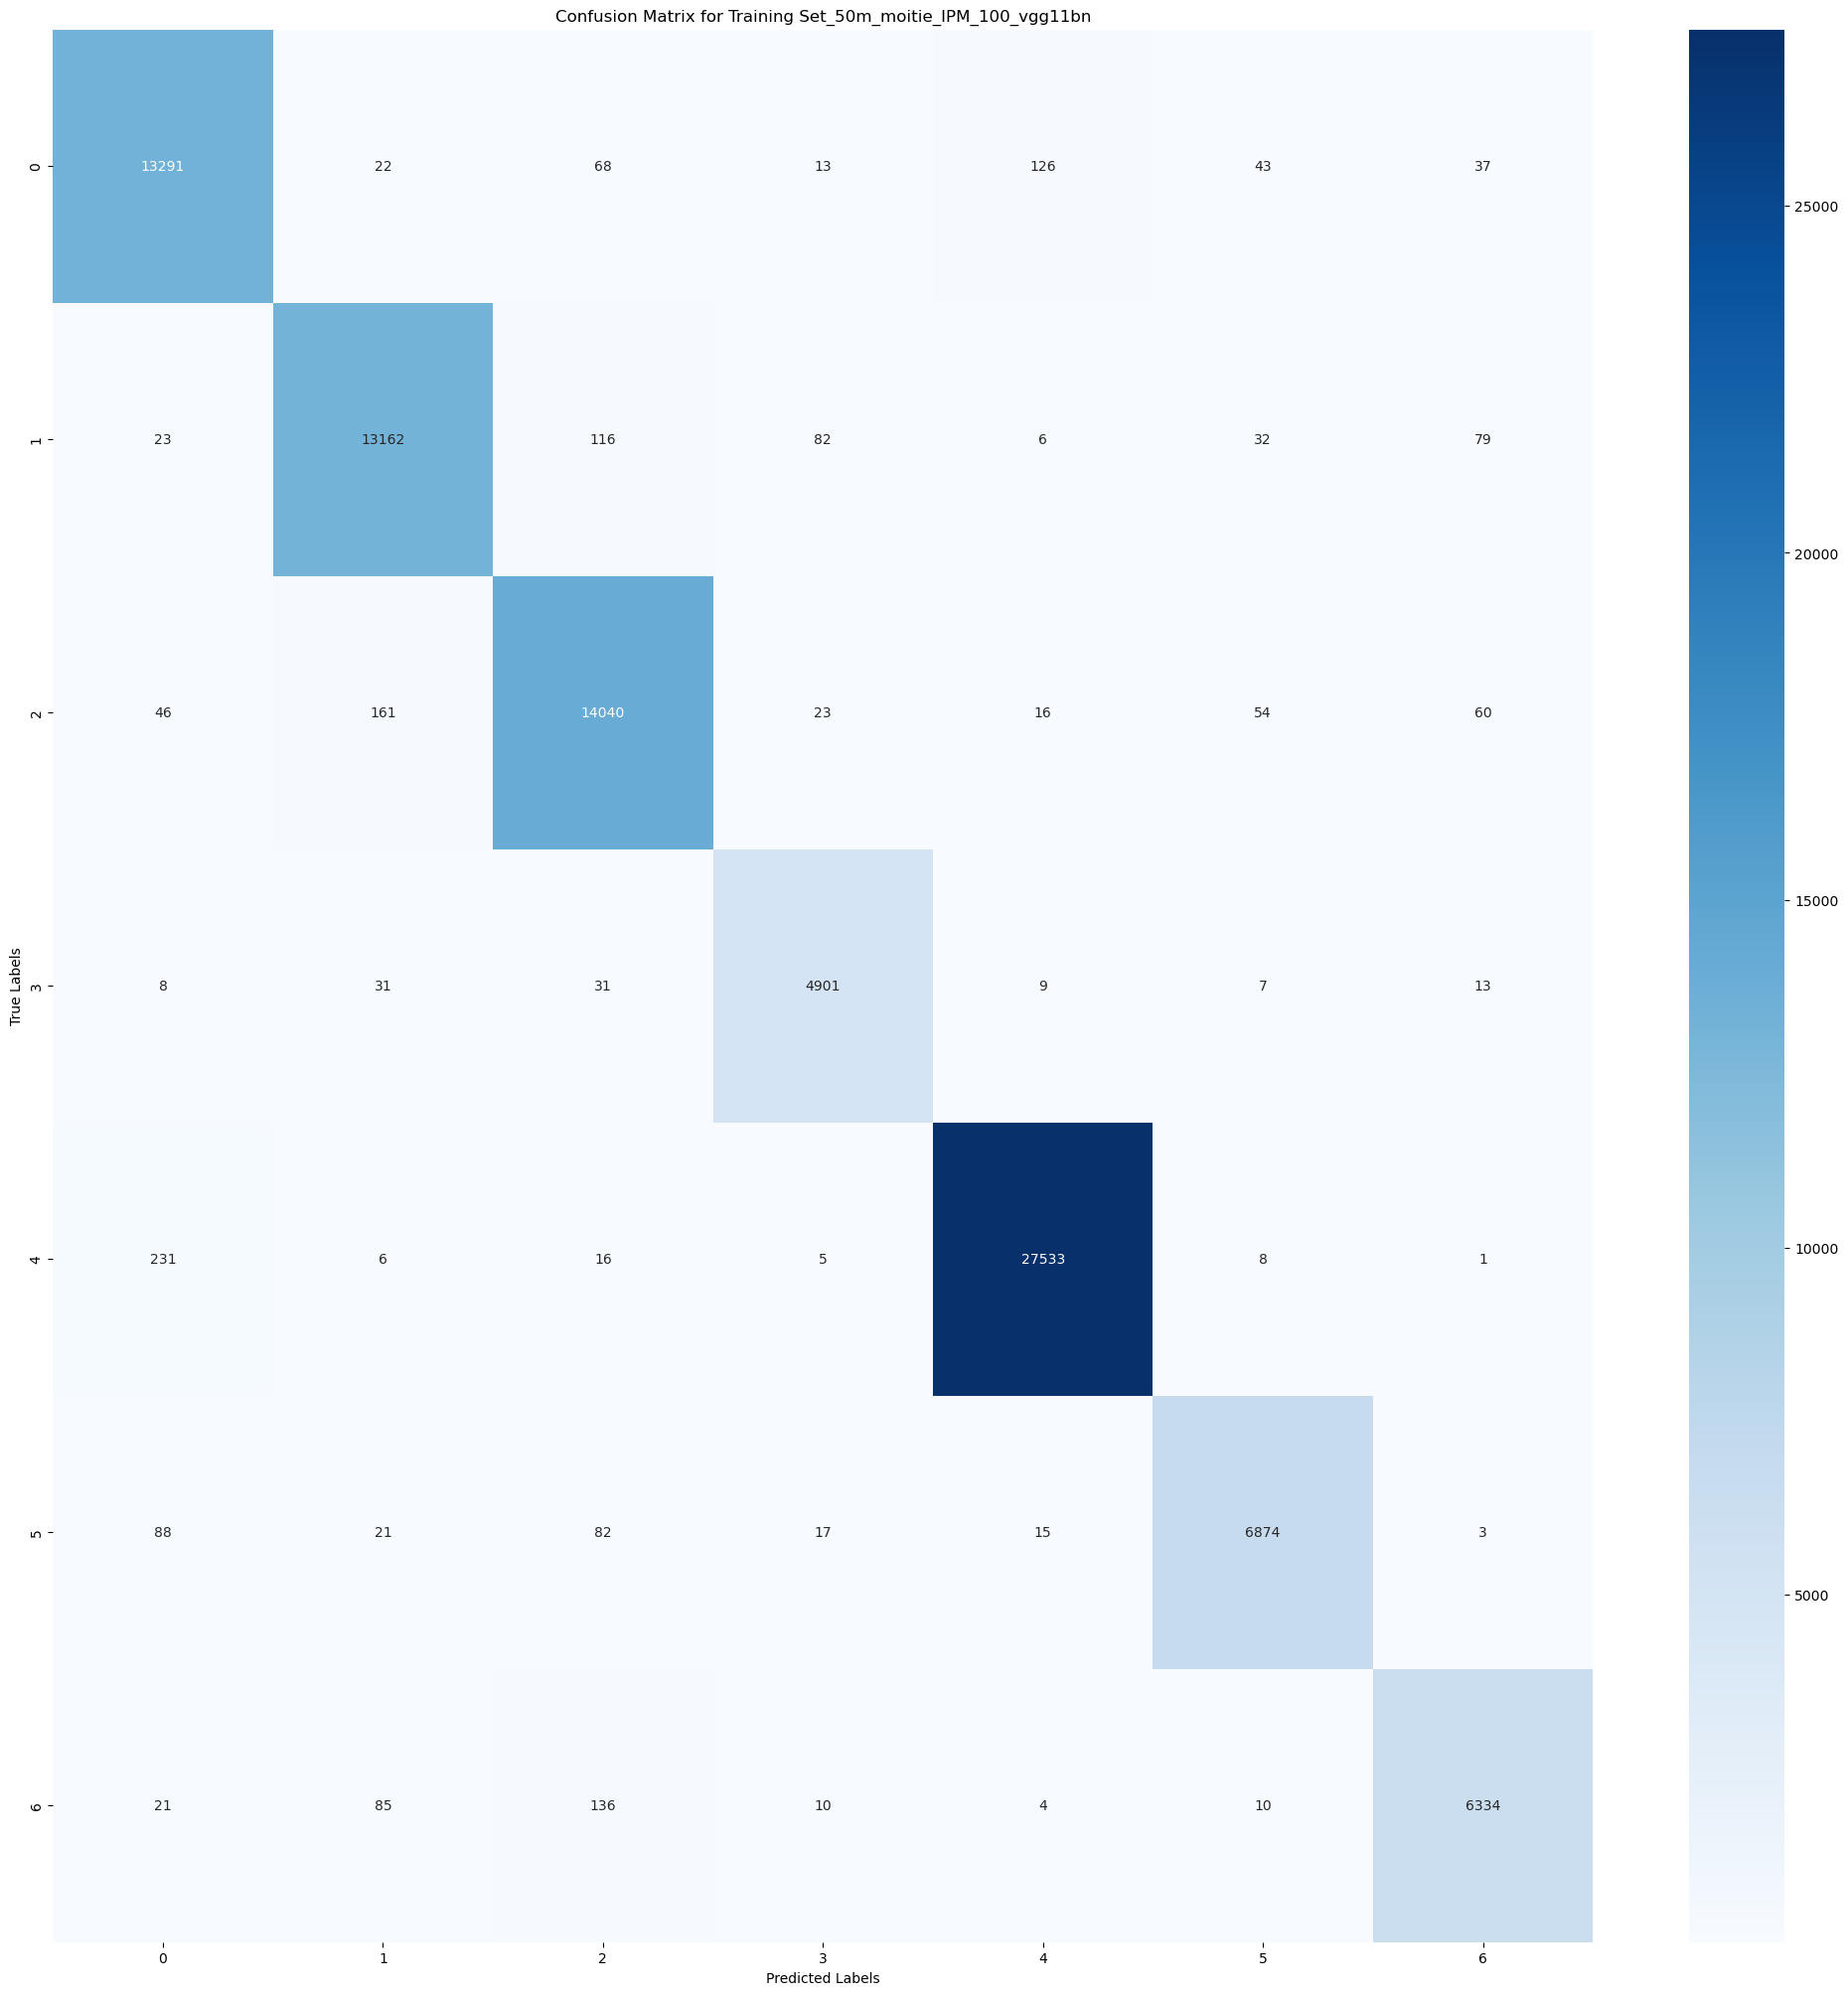

In [57]:
# Sauvegarder les labels et les prédictions
all_preds = []
all_labels = []

for inputs, labels in dataloaders_dict[f'train_{X}m_{moitiequarts}_IPM_{Y}']:
    inputs = inputs.to(device)
    labels = labels.to(device)

    with torch.set_grad_enabled(False):
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)

    all_preds.extend(preds.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

all_preds_tensor = torch.tensor(all_preds)
all_labels_tensor = torch.tensor(all_labels)

# Matrice de confusion pour le jeu d'entraînement
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(25, 25))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix for Training Set_{X}m_{moitiequarts}_IPM_{Y}_vgg11bn')
plt.show()



In [58]:
# La confusion matrix
cm

array([[13291,    22,    68,    13,   126,    43,    37],
       [   23, 13162,   116,    82,     6,    32,    79],
       [   46,   161, 14040,    23,    16,    54,    60],
       [    8,    31,    31,  4901,     9,     7,    13],
       [  231,     6,    16,     5, 27533,     8,     1],
       [   88,    21,    82,    17,    15,  6874,     3],
       [   21,    85,   136,    10,     4,    10,  6334]], dtype=int64)

Ce fragment de code génère un rapport de classification à partir des étiquettes réelles et des prédictions collectées lors de l'évaluation du modèle sur l'ensemble d'entraînement.

In [59]:
# Rapport de classification
from sklearn.metrics import classification_report
# Convertit les listes en array de types numpy si elles ne sont pas convertit
# Supposons que "all_preds" et "all_labels" sont des listes d'array numpy ou des tenseurs en PyTorch 
true_labels = np.array(all_labels)
predicted_labels = np.array(all_preds)

# Génère un rapport de  classification
report = classification_report(true_labels, predicted_labels, digits=4)
print(report)



              precision    recall  f1-score   support

           0     0.9696    0.9773    0.9734     13600
           1     0.9758    0.9750    0.9754     13500
           2     0.9690    0.9750    0.9720     14400
           3     0.9703    0.9802    0.9752      5000
           4     0.9936    0.9904    0.9920     27800
           5     0.9781    0.9682    0.9731      7100
           6     0.9704    0.9597    0.9650      6600

    accuracy                         0.9788     88000
   macro avg     0.9753    0.9751    0.9752     88000
weighted avg     0.9788    0.9788    0.9788     88000



In [60]:
#Conversion des listes en array de types Numpy(Si ce n'est pas le cas)
import numpy as np

all_preds_array = np.array(all_preds)
all_labels_array = np.array(all_labels)

# Use classification_report to Calculate Metrics
from sklearn.metrics import classification_report

# Calcul et imprime le rapport de classification
print(classification_report(all_labels_array, all_preds_array))

# Calcul de l'Accuracy par Classe Mécanique
from sklearn.metrics import confusion_matrix

# Calcul de l'Accuracy par classe
cm = confusion_matrix(all_labels_array, all_preds_array)
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)
print(per_class_accuracy)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     13600
           1       0.98      0.97      0.98     13500
           2       0.97      0.97      0.97     14400
           3       0.97      0.98      0.98      5000
           4       0.99      0.99      0.99     27800
           5       0.98      0.97      0.97      7100
           6       0.97      0.96      0.97      6600

    accuracy                           0.98     88000
   macro avg       0.98      0.98      0.98     88000
weighted avg       0.98      0.98      0.98     88000

[0.97727941 0.97496296 0.975      0.9802     0.99039568 0.96816901
 0.95969697]


Cette portion de code étendue est conçue pour évaluer de manière plus détaillée la performance du modèle de réseau de neurones convolutif (CNN) sur l'ensemble de validation.  

100%|██████████| 21838/21838 [08:09<00:00, 44.61it/s]


Validation Loss: 0.7179
Validation Accuracy: 0.8604


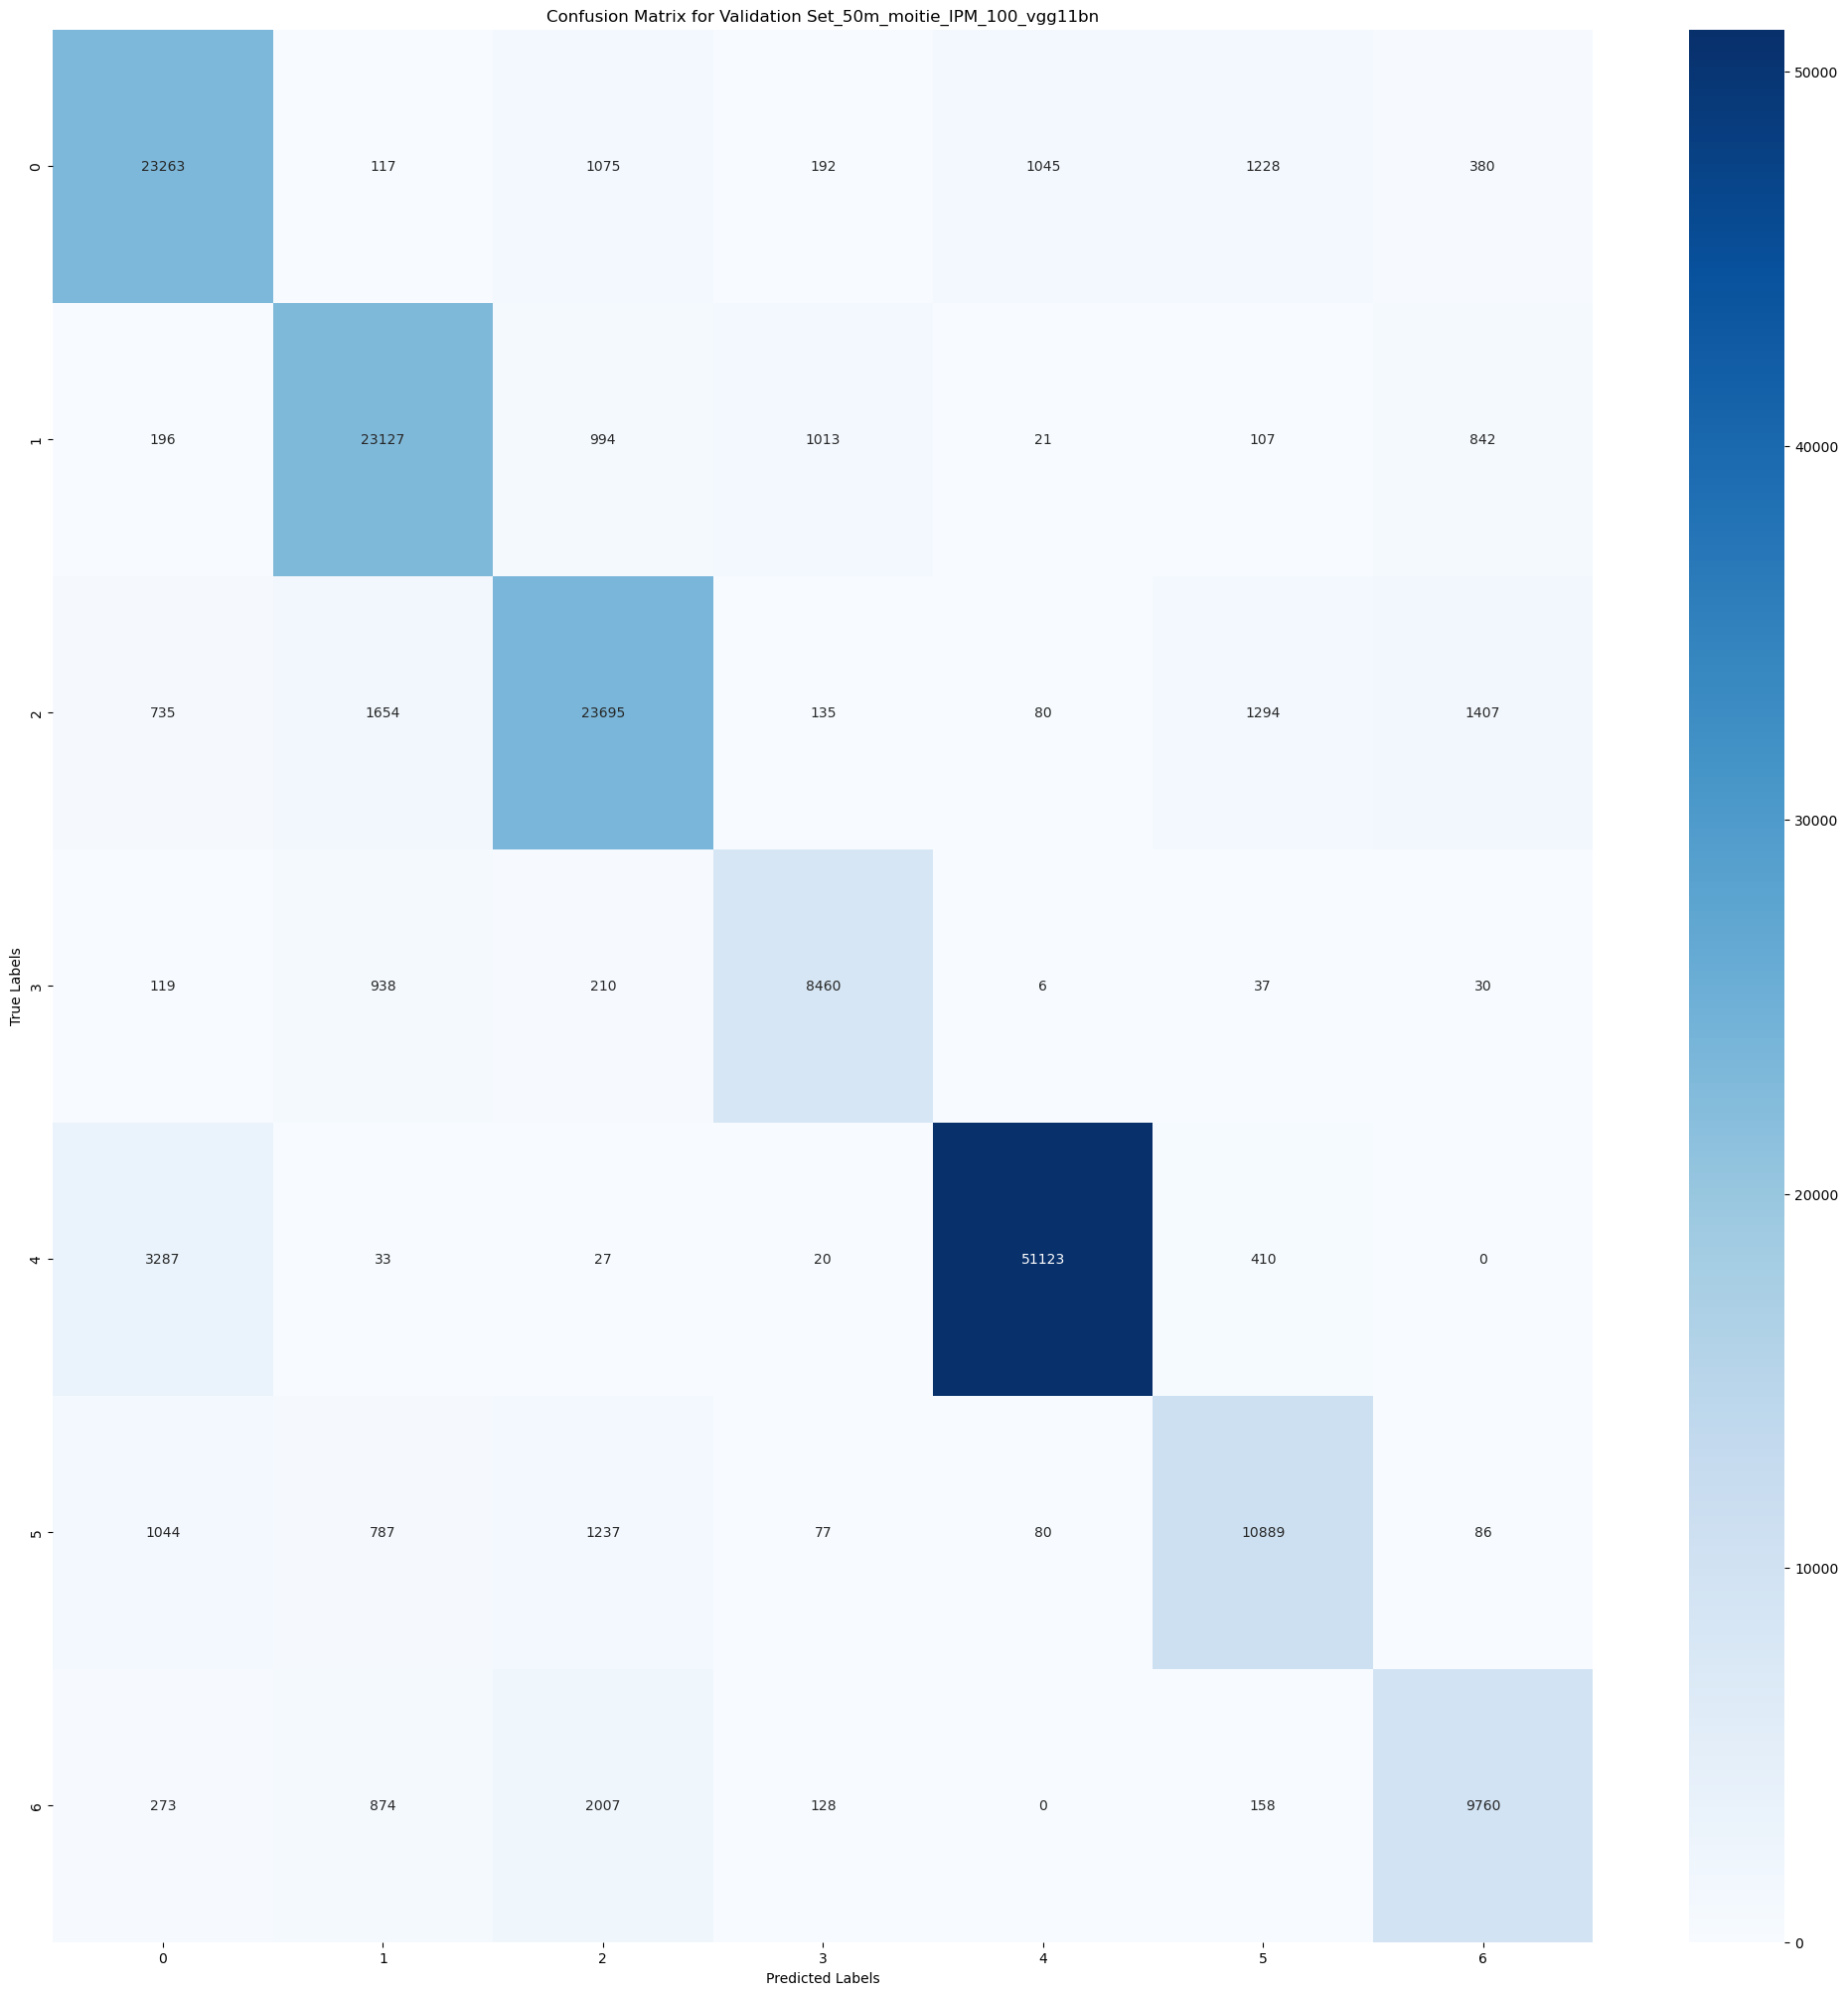

In [61]:
# Évaluation sur le jeu de validation
# Importation de la bibliothèque nécessaire pour la barre de progression
from tqdm import tqdm

# Met le modèle en mode d'évaluation. Cela est crucial car cela désactive des comportements spécifiques à l'entraînement,
# tels que les dropout layers et la normalisation par lots, qui ne devraient pas être utilisés lors de l'évaluation.
model_ft.eval()

# Initialisation des variables pour accumuler la perte totale et le nombre total de prédictions correctes
running_loss = 0.0
running_corrects = 0
total = 0

# Désactive le calcul du gradient, réduisant la consommation de mémoire et accélérant le processus
# puisque les gradients ne sont pas nécessaires pour l'évaluation.
with torch.no_grad():
        #Itère sur les données de l'ensemble de validation. tqdm est utilisé pour afficher une barre de progression.
    for inputs, labels in tqdm(dataloaders_dict[f'valid_{X}m_{moitiequarts}_IPM_{Y}']):
        # Transfère les inputs et les labels sur le dispositif de calcul (GPU ou CPU).
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Calcule les sorties en passant les inputs à travers le modèle.
        outputs = model_ft(inputs)
        
        # Calcule la perte entre les sorties prédites et les vrais labels.
        loss = criterion(outputs, labels)
        
        # Trouve la classe prédite pour chaque input en prenant l'indice de la valeur maximale dans les prédictions logit.
        _, preds = torch.max(outputs, 1)

        # Accumule la perte totale en ajoutant la perte de ce lot.
        running_loss += loss.item() * inputs.size(0)
        
        # Accumule le nombre total de prédictions correctes.
        running_corrects += torch.sum(preds == labels.data)
        
        # Accumule le nombre total d'exemples vus.
        total += inputs.size(0)
# Calcule la perte moyenne sur l'ensemble de validation.
val_loss = running_loss / total

# Calcule la précision globale sur l'ensemble de validation.
val_acc = running_corrects.double() / total

# Affiche la perte moyenne et la précision sur l'ensemble de validation.
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_acc:.4f}')

# Matrice de confusion pour le jeu de validation
val_preds = []
val_labels = []

for inputs, labels in dataloaders_dict[f'valid_{X}m_{moitiequarts}_IPM_{Y}']:
    inputs = inputs.to(device)
    labels = labels.to(device)

    with torch.no_grad():
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
    
    val_preds.extend(preds.cpu().numpy())
    val_labels.extend(labels.cpu().numpy())

    
# Calcul de la matrice de confusion en utilisant scikit-learn
cm_val = confusion_matrix(val_labels, val_preds)
# Utilisation de Seaborn pour afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix for Validation Set_{X}m_{moitiequarts}_IPM_{Y}_vgg11bn')
plt.show()



In [62]:
# Rapport de classification pour le jeu de validation
# Conversion des listes en tableaux numpy pour une utilisation avec scikit-learn

val_true_labels_array = np.array(val_labels)
val_predictions_array = np.array(val_preds)

# Générez le rapport de classification pour l'ensemble de validation
val_report = classification_report(val_true_labels_array, val_predictions_array, digits=4)
print(f"Classification Report for Validation Set_{X}m_{moitiequarts}_IPM_{Y}:\n", val_report)



Classification Report for Validation Set_50m_moitie_IPM_100:
               precision    recall  f1-score   support

           0     0.8045    0.8521    0.8276     27300
           1     0.8401    0.8794    0.8593     26300
           2     0.8102    0.8171    0.8136     29000
           3     0.8439    0.8633    0.8535      9800
           4     0.9765    0.9312    0.9533     54900
           5     0.7710    0.7668    0.7689     14200
           6     0.7805    0.7394    0.7594     13200

    accuracy                         0.8604    174700
   macro avg     0.8324    0.8356    0.8337    174700
weighted avg     0.8625    0.8604    0.8611    174700



In [63]:
# Précision (Accuracy) par classe pour le jeu de validation
# Calculez la matrice de confusion pour l'ensemble de validation
val_cm = confusion_matrix(val_true_labels_array, val_predictions_array)

# Calculez la précision par classe manuellement à partir de la matrice de confusion
val_per_class_accuracy = val_cm.diagonal() / val_cm.sum(axis=1)
print(f"Per-class Accuracy for the Validation Set_{X}m_{moitiequarts}_IPM_{Y}:", val_per_class_accuracy)

Per-class Accuracy for the Validation Set_50m_moitie_IPM_100: [0.85212454 0.87935361 0.81706897 0.86326531 0.93120219 0.76683099
 0.73939394]


##### Sauvegarde des graphes

In [64]:
import os
import numpy as np
import pandas as pd
import torch
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Configuration initiale

BASE_DIR = r'D:\Poverty_Predict_Par_Region'#Choisir une base directory

GRAPH_DIR = os.path.join(BASE_DIR, f'Graph_etape_cnn_pred_nightlights_{X}m_{moitiequarts}_IPM_{Y}_vgg11bn')
os.makedirs(GRAPH_DIR, exist_ok=True)

# Fonction pour générer et sauvegarder l'histogramme de distribution
def save_histogram(data, column, title, filename):
    plt.hist(data[column], bins='auto', alpha=0.7, rwidth=0.85)
    plt.xlabel('Nightlights Bin')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.grid(axis='y', alpha=0.75)
    plt.savefig(os.path.join(GRAPH_DIR, filename))
    plt.close()

# Fonction pour générer et sauvegarder la heatmap de la matrice de confusion
def save_confusion_matrix_heatmap(y_true, y_pred, title, filename):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(25,25))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.savefig(os.path.join(GRAPH_DIR, filename))
    plt.close()

# Fonction pour générer et sauvegarder le rapport de classification
def save_classification_report(y_true, y_pred, filename, digits=4):
    report = classification_report(y_true, y_pred, digits=digits)
    with open(os.path.join(GRAPH_DIR, filename), 'w') as f:
        f.write(report)

# Génération et sauvegarde des fichiers
save_histogram(globals()[df_name], f'nightlights_{X}m_bins', f'Distribution of Nightlights Bin', f'distribution_nightlights_bin_{X}m_IPM_{Y}_vgg11bn.png')
save_confusion_matrix_heatmap(all_labels, all_preds, f'Confusion Matrix for Training Set', f'confusion_matrix_train_{X}m_IPM_{Y}_vgg11bn.png')
save_confusion_matrix_heatmap(val_labels, val_preds, f'Confusion Matrix for Validation Set', f'confusion_matrix_val_{X}m_IPM_{Y}_vgg11bn.png')
save_classification_report(all_labels_array, all_preds_array, f'classification_report_train_{X}m_IPM_{Y}_vgg11bn.txt')
save_classification_report(val_true_labels_array, val_predictions_array, f'classification_report_val_{X}m_IPM_{Y}_vgg11bn.txt')